📂 Please upload your CSV (e.g., nba_traditional_RS_2020_2025.csv)


Saving nba_traditional_RS_2020_2025.csv to nba_traditional_RS_2020_2025.csv
✅ Loaded: nba_traditional_RS_2020_2025.csv
📏 Applied filters: GP ≥ 30, MIN ≥ 800
Remaining rows: 1527


/tmp/ipython-input-80152586.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: topk_by_metric(x, metric, k))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

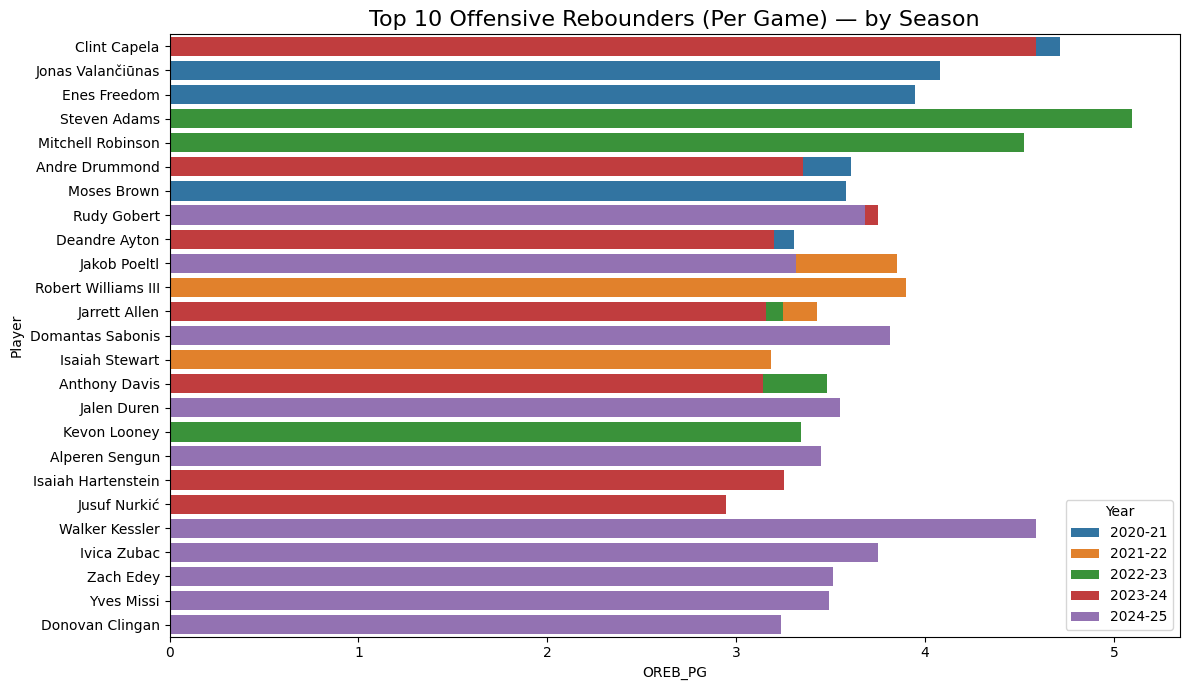

/tmp/ipython-input-80152586.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: topk_by_metric(x, metric, k))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

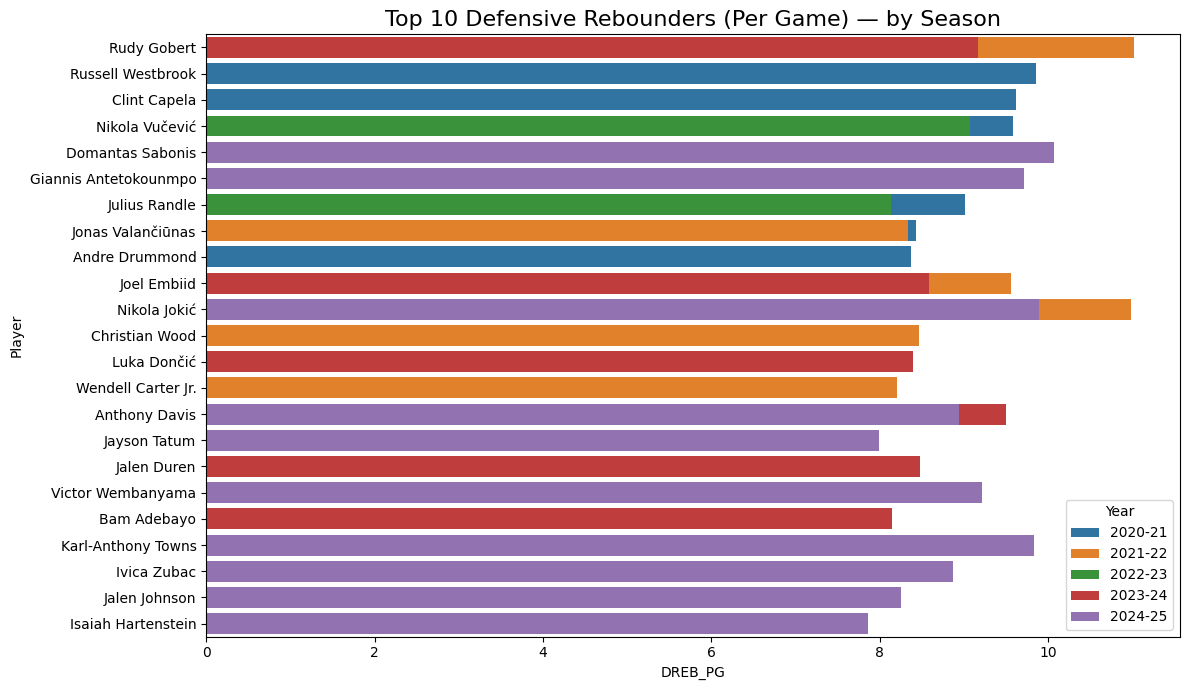

/tmp/ipython-input-80152586.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: topk_by_metric(x, metric, k))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

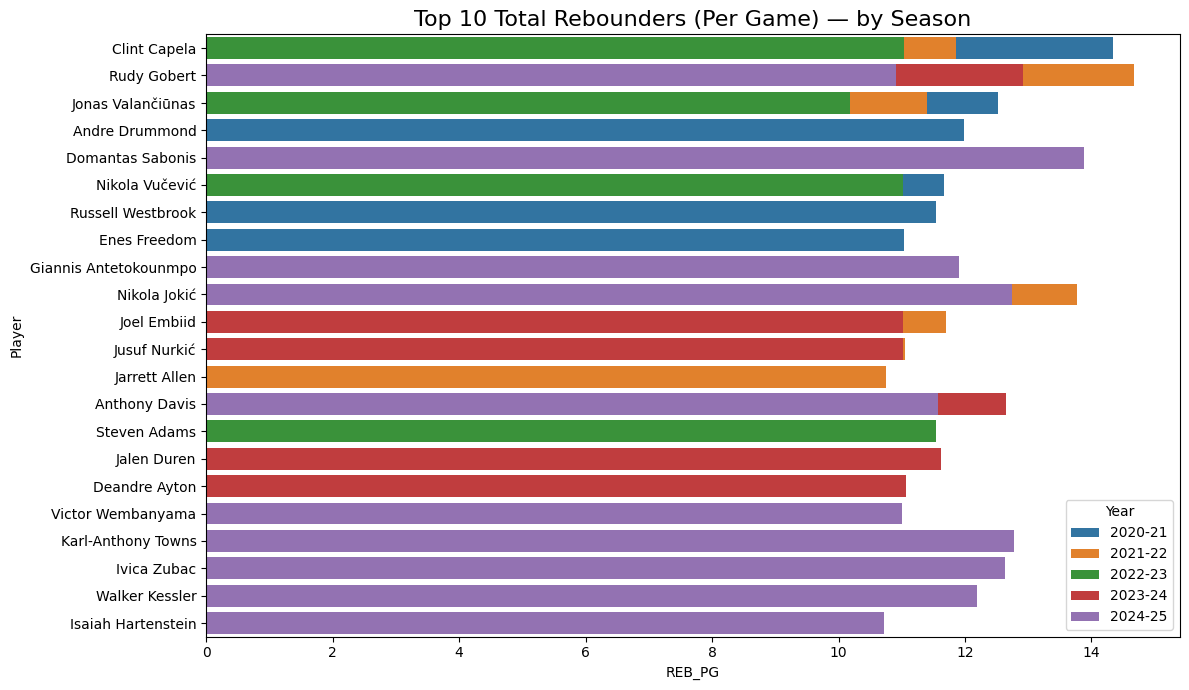

/tmp/ipython-input-80152586.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: topk_by_metric(x, metric, k))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

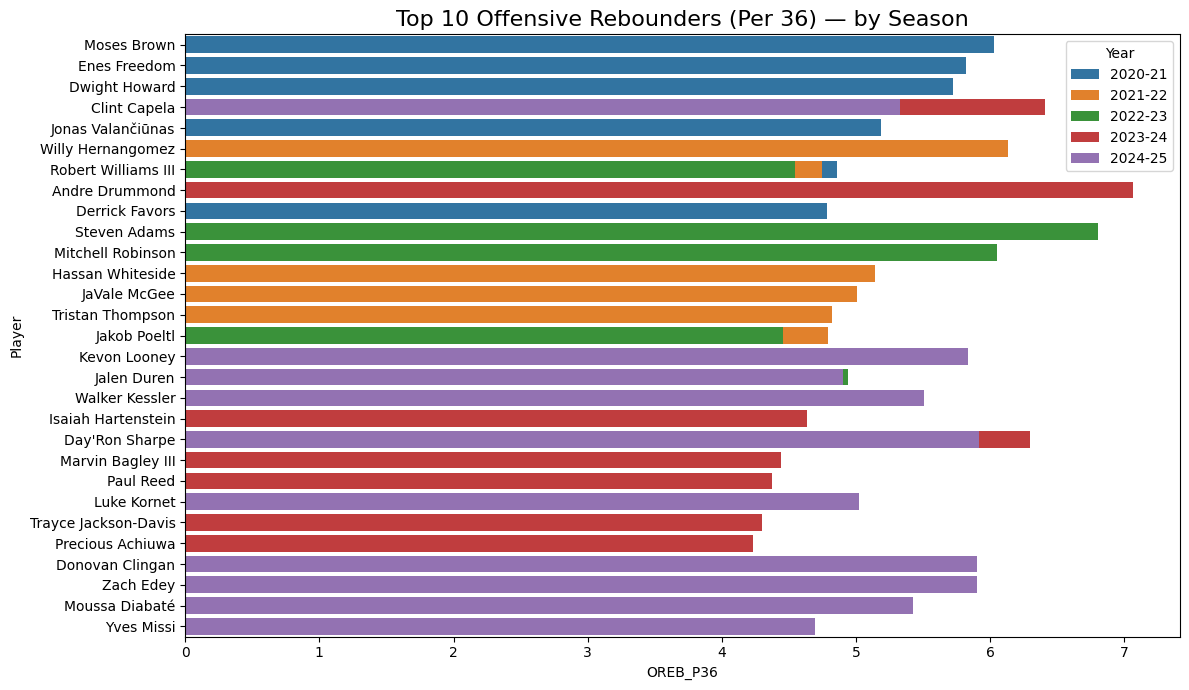

/tmp/ipython-input-80152586.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: topk_by_metric(x, metric, k))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

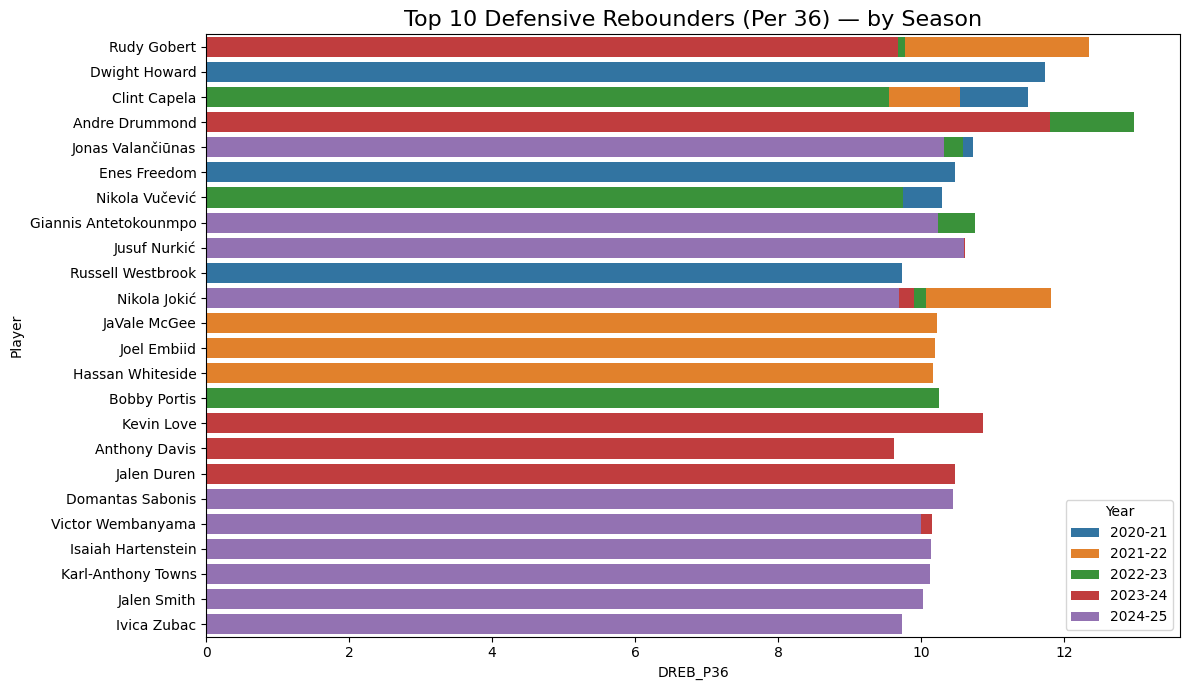

/tmp/ipython-input-80152586.py:66: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: topk_by_metric(x, metric, k))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

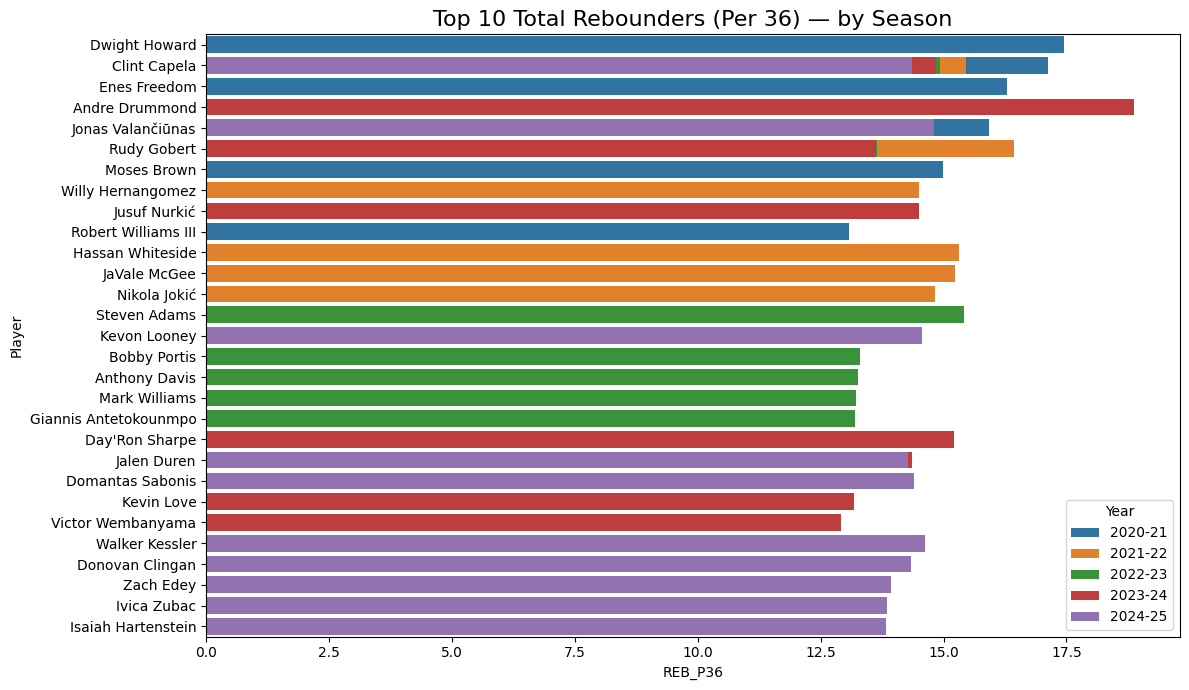

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

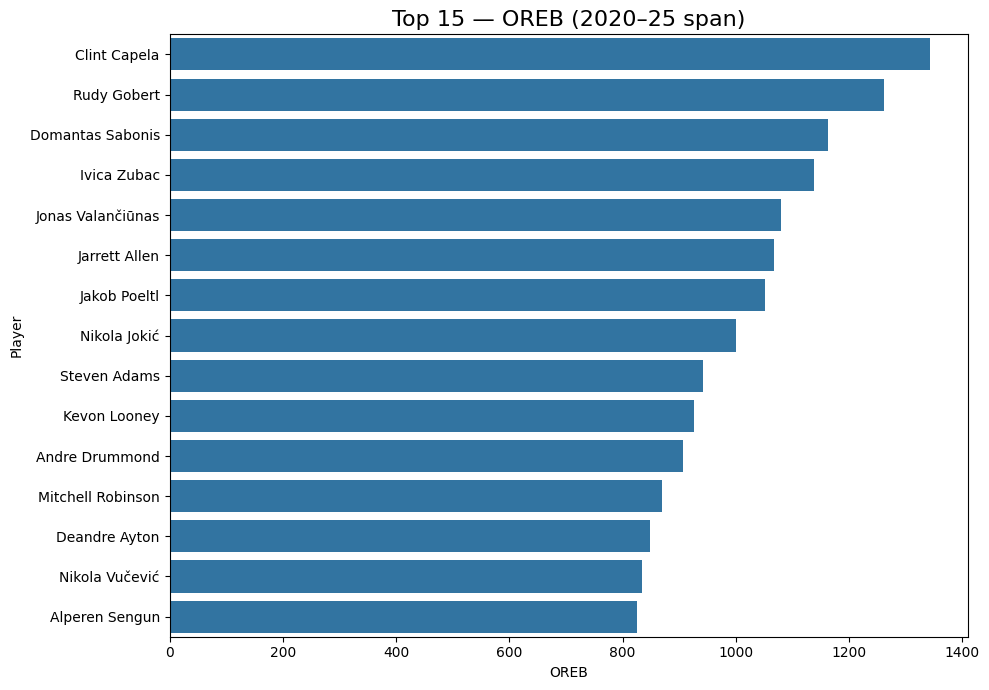

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

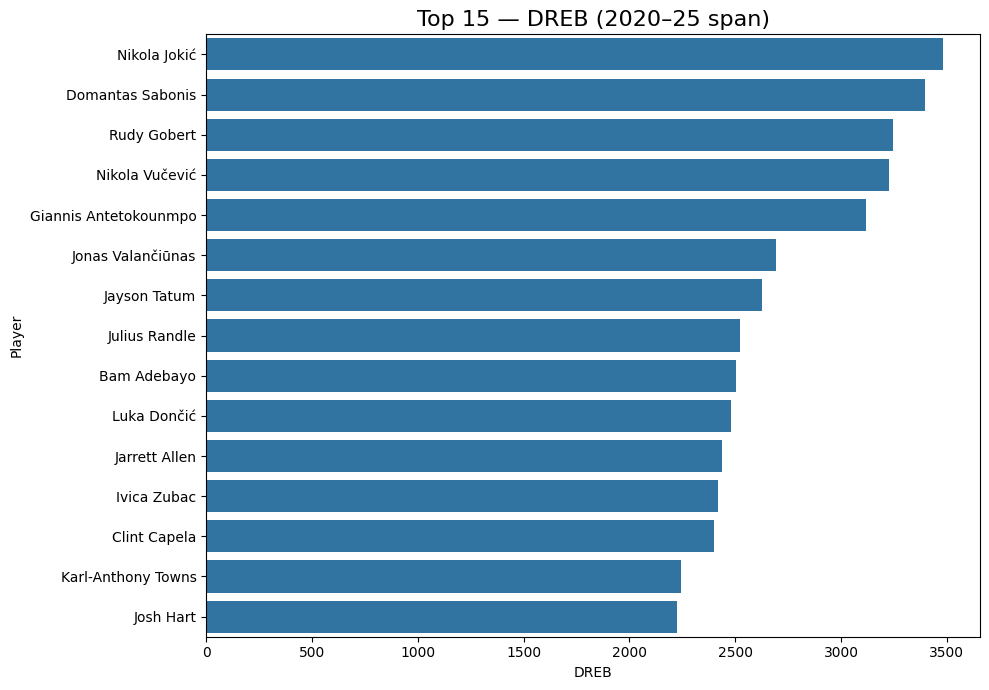

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

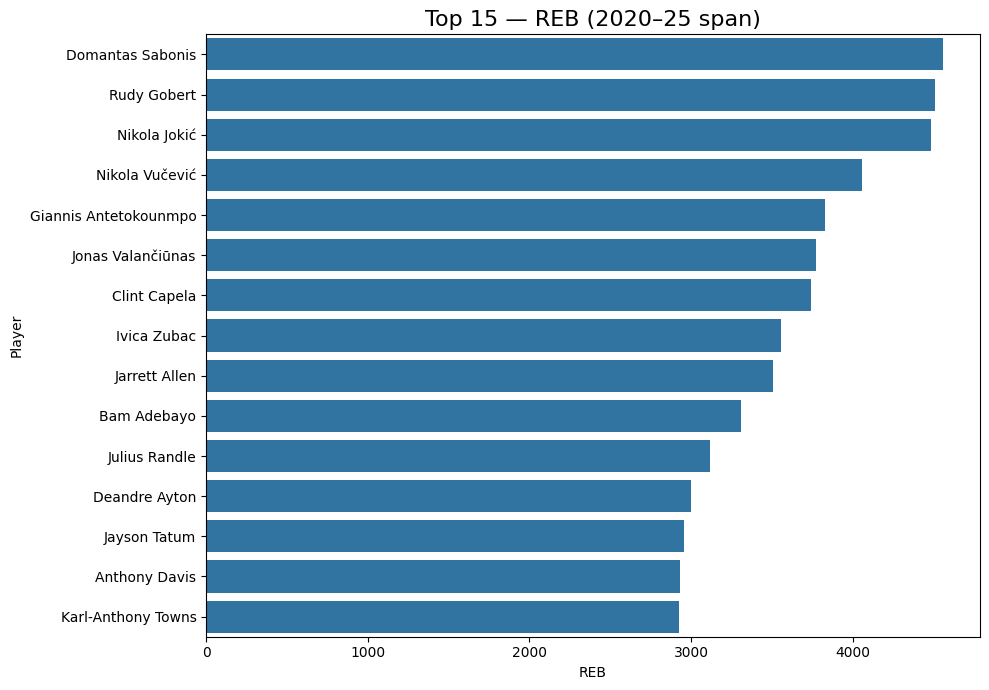

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

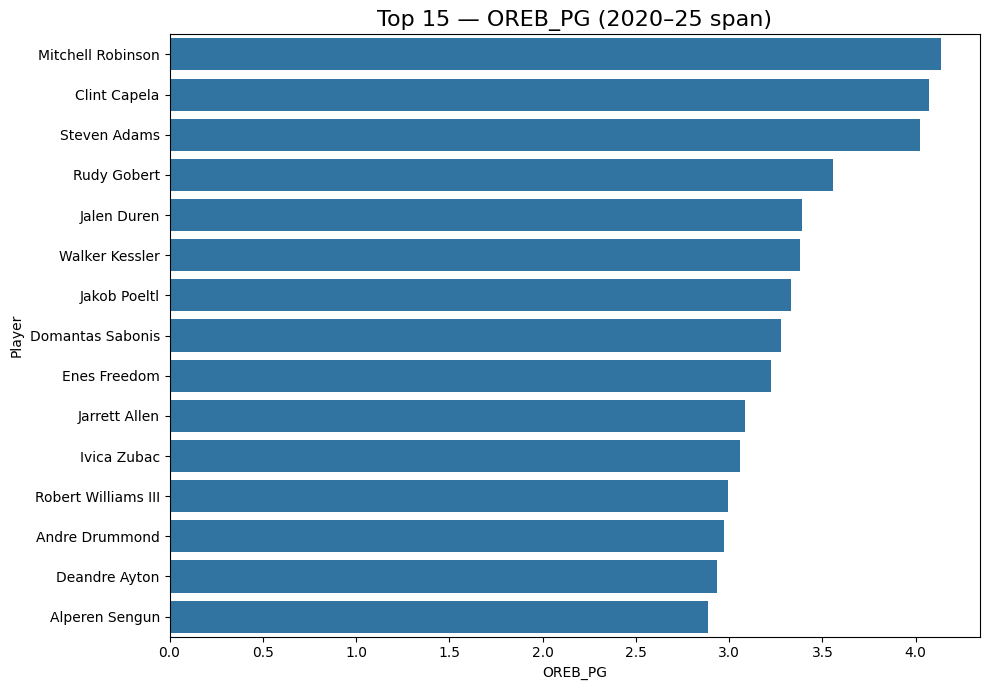

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

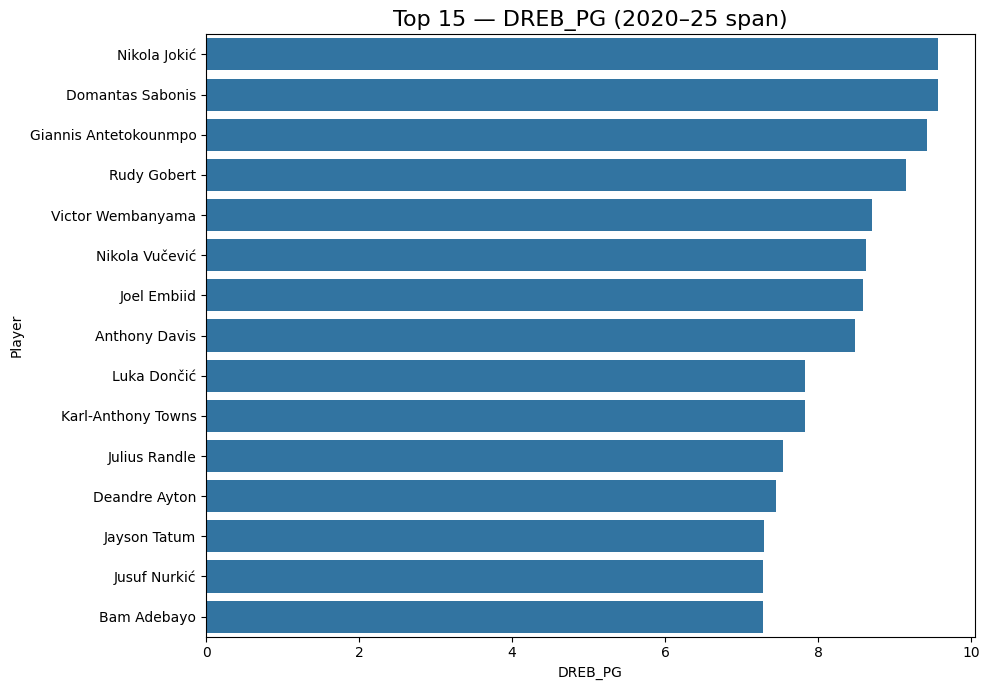

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

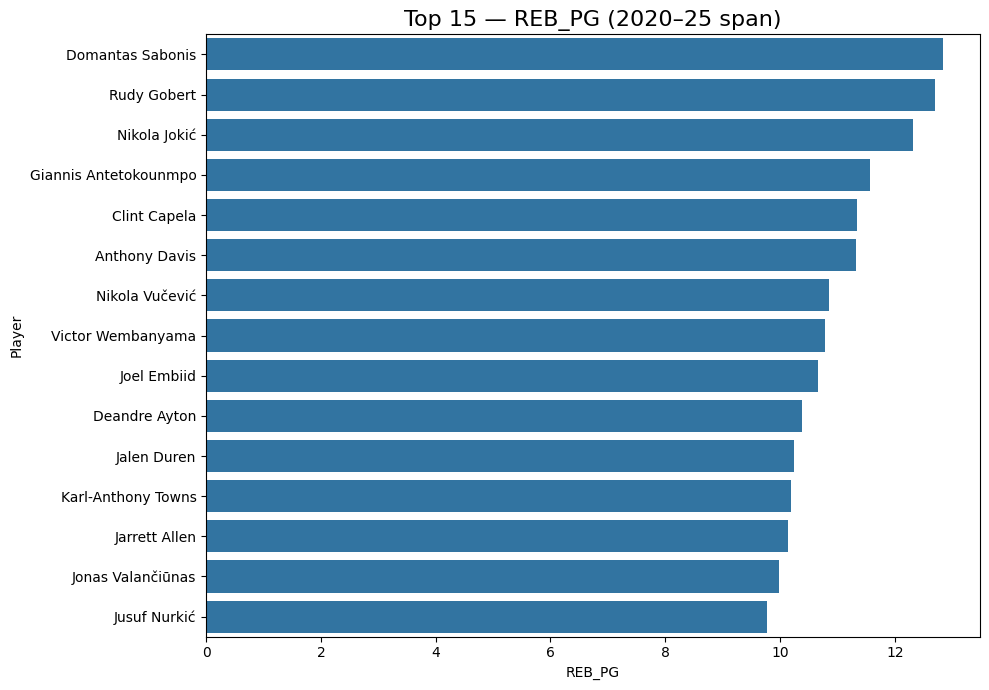

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

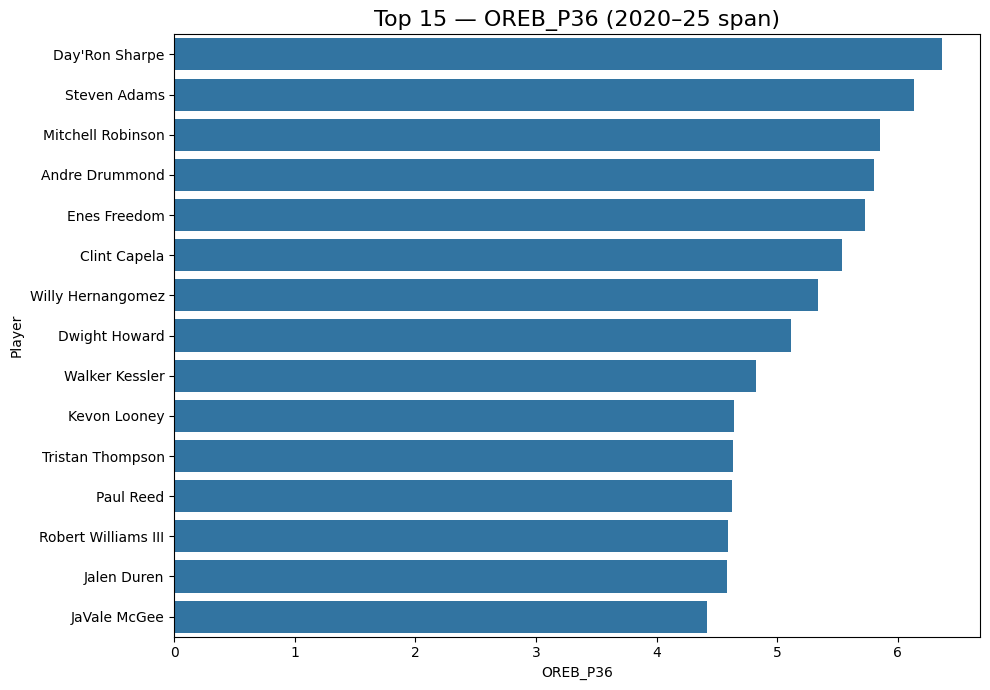

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

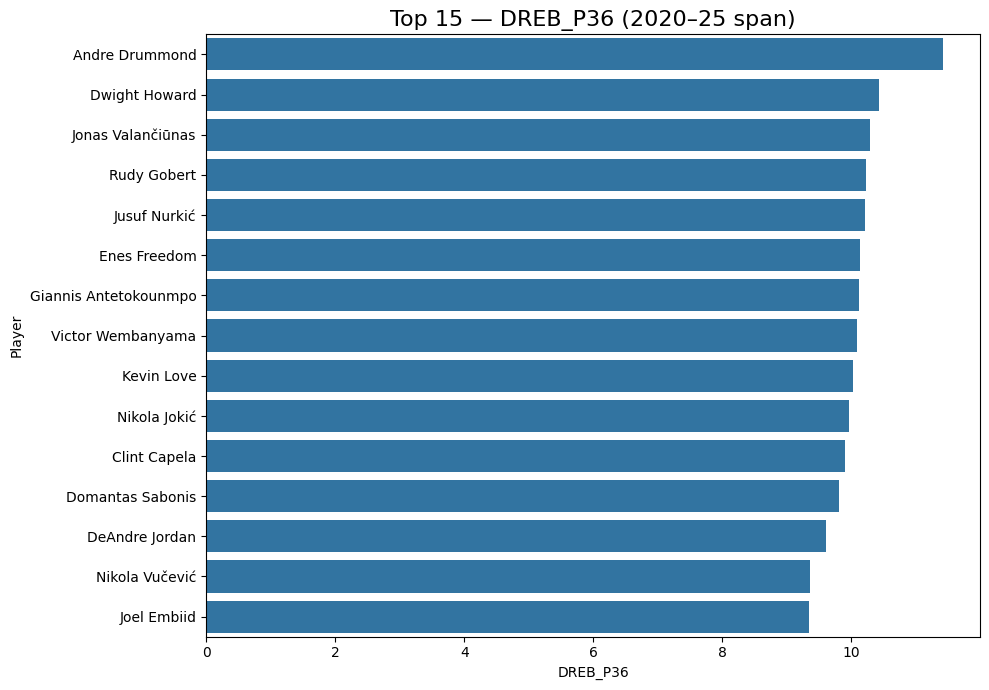

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

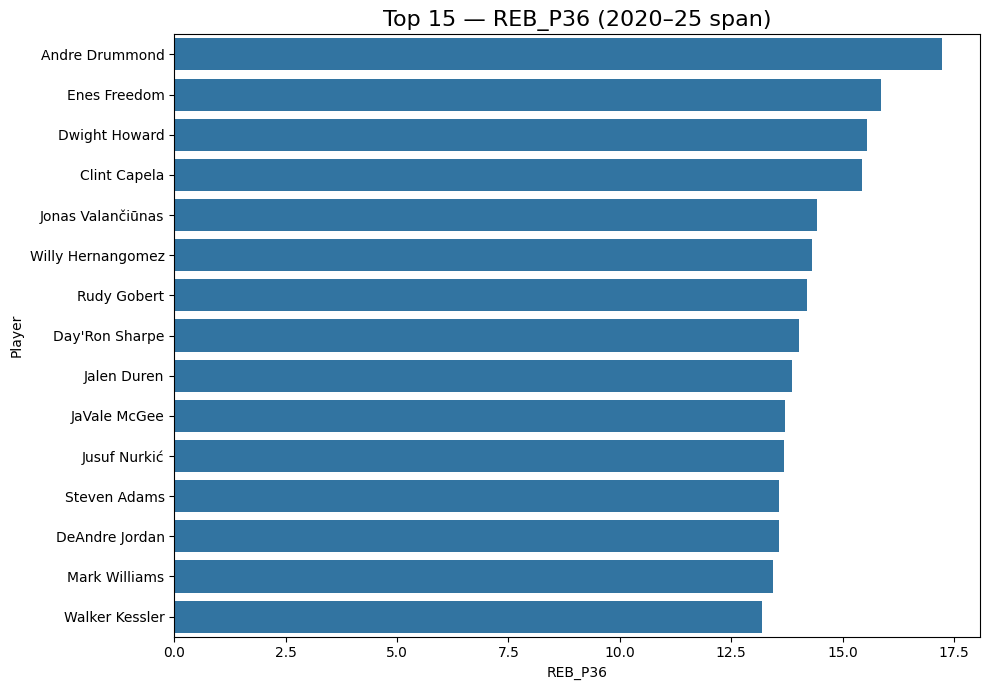

✅ Finished: Per-season and span-wide rebounding leaders saved to CSV & PNG.


In [1]:
# 🏀 Rebounding Specialists (2020–25) — Google Colab Ready
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ========== 1) Upload & Load ==========
print("📂 Please upload your CSV (e.g., nba_traditional_RS_2020_2025.csv)")
uploaded = files.upload()
file_name = list(uploaded.keys())[0]
print(f"✅ Loaded: {file_name}")

df = pd.read_csv(file_name)

# ========== 2) Basic Clean ==========
if "Season_Type" in df.columns:
    df["Season_Type"] = df["Season_Type"].astype(str).str.replace("%20", " ", regex=False)

# Force numeric on needed cols
num_cols = ["GP","MIN","OREB","DREB","REB"]
for c in num_cols:
    if c in df.columns:
        df[c] = pd.to_numeric(df[c], errors="coerce")

# Keep only rows with basic data
df = df.dropna(subset=["Year","PLAYER","GP","MIN","OREB","DREB","REB"])

# ========== 3) Consolidate per player-season ==========
# If a player appears multiple times (traded), aggregate totals for that season & type.
group_keys = ["Year", "Season_Type", "PLAYER"]
agg_map = {"GP":"sum", "MIN":"sum", "OREB":"sum", "DREB":"sum", "REB":"sum"}
df_season = (
    df.groupby(group_keys, dropna=False, as_index=False)
      .agg(agg_map)
)

# ========== 4) Compute Rates ==========
# Per-game
for stat in ["OREB","DREB","REB"]:
    df_season[f"{stat}_PG"] = df_season[stat] / df_season["GP"]

# Per-36 (using season totals): stat_per36 = (stat_total / minutes_total) * 36
min_mask = df_season["MIN"] > 0
for stat in ["OREB","DREB","REB"]:
    df_season[f"{stat}_P36"] = np.where(
        min_mask, (df_season[stat] / df_season["MIN"]) * 36, np.nan
    )

# ========== 5) Filters (edit as you like) ==========
MIN_GP = 30        # minimum games in a season
MIN_MIN = 800      # minimum minutes in a season
filtered = df_season[(df_season["GP"] >= MIN_GP) & (df_season["MIN"] >= MIN_MIN)].copy()

print(f"📏 Applied filters: GP ≥ {MIN_GP}, MIN ≥ {MIN_MIN}")
print(f"Remaining rows: {len(filtered)}")

# ========== 6) Helper: top-k per season ==========
def topk_by_metric(d, metric, k=10):
    return (d.sort_values([metric, "PLAYER"], ascending=[False, True])
              .head(k))

def topk_grid(data, metric, title, fname_png, k=10):
    top10 = (
        data.groupby(["Year","Season_Type"], group_keys=True)
            .apply(lambda x: topk_by_metric(x, metric, k))
            .reset_index(drop=True)
    )
    # Save CSV
    out_csv = f"top{k}_rebounding_{metric}_per_season.csv"
    top10.to_csv(out_csv, index=False)
    files.download(out_csv)

    # Plot (single combined bar; colored by Year)
    plt.figure(figsize=(12, 7))
    sns.barplot(data=top10, x=metric, y="PLAYER", hue="Year", dodge=False)
    plt.title(title, fontsize=16)
    plt.xlabel(metric)
    plt.ylabel("Player")
    plt.tight_layout()
    plt.savefig(fname_png, dpi=300)
    files.download(fname_png)
    plt.show()
    return top10

# ========== 7) Top 10 Per Season (Per-Game) ==========
top10_oreb_pg = topk_grid(filtered, "OREB_PG",
                          "Top 10 Offensive Rebounders (Per Game) — by Season",
                          "top10_OREB_PG_by_season.png")

top10_dreb_pg = topk_grid(filtered, "DREB_PG",
                          "Top 10 Defensive Rebounders (Per Game) — by Season",
                          "top10_DREB_PG_by_season.png")

top10_reb_pg  = topk_grid(filtered, "REB_PG",
                          "Top 10 Total Rebounders (Per Game) — by Season",
                          "top10_REB_PG_by_season.png")

# ========== 8) Top 10 Per Season (Per-36) ==========
top10_oreb_p36 = topk_grid(filtered, "OREB_P36",
                           "Top 10 Offensive Rebounders (Per 36) — by Season",
                           "top10_OREB_P36_by_season.png")

top10_dreb_p36 = topk_grid(filtered, "DREB_P36",
                           "Top 10 Defensive Rebounders (Per 36) — by Season",
                           "top10_DREB_P36_by_season.png")

top10_reb_p36  = topk_grid(filtered, "REB_P36",
                           "Top 10 Total Rebounders (Per 36) — by Season",
                           "top10_REB_P36_by_season.png")

# ========== 9) Overall 2020–25 Leaders ==========
# Aggregate across all seasons/types per player
agg_span = (df_season.groupby("PLAYER", as_index=False)
            .agg({"GP":"sum","MIN":"sum","OREB":"sum","DREB":"sum","REB":"sum"}))

# Recompute span-wide per-game and per-36
for stat in ["OREB","DREB","REB"]:
    agg_span[f"{stat}_PG"] = agg_span[stat] / agg_span["GP"]
    agg_span[f"{stat}_P36"] = np.where(
        agg_span["MIN"] > 0, (agg_span[stat] / agg_span["MIN"]) * 36, np.nan
    )

# Optional: span-wide filters (to avoid tiny career samples)
SPAN_MIN_GP = 82
SPAN_MIN_MIN = 2000
agg_span_f = agg_span[(agg_span["GP"] >= SPAN_MIN_GP) & (agg_span["MIN"] >= SPAN_MIN_MIN)].copy()

def save_rank_and_plot_span(df_in, metric, k=15):
    topk = df_in.sort_values([metric, "PLAYER"], ascending=[False, True]).head(k)
    out_csv = f"top{k}_rebounding_{metric}_2020_25_span.csv"
    topk.to_csv(out_csv, index=False)
    files.download(out_csv)

    plt.figure(figsize=(10, 7))
    sns.barplot(data=topk, x=metric, y="PLAYER")
    plt.title(f"Top {k} — {metric} (2020–25 span)", fontsize=16)
    plt.xlabel(metric); plt.ylabel("Player")
    plt.tight_layout()
    out_png = f"top{k}_{metric}_2020_25_span.png"
    plt.savefig(out_png, dpi=300)
    files.download(out_png)
    plt.show()
    return topk

# Totals
_ = save_rank_and_plot_span(agg_span_f, "OREB", k=15)
_ = save_rank_and_plot_span(agg_span_f, "DREB", k=15)
_ = save_rank_and_plot_span(agg_span_f, "REB",  k=15)

# Per-Game
_ = save_rank_and_plot_span(agg_span_f, "OREB_PG", k=15)
_ = save_rank_and_plot_span(agg_span_f, "DREB_PG", k=15)
_ = save_rank_and_plot_span(agg_span_f, "REB_PG",  k=15)

# Per-36
_ = save_rank_and_plot_span(agg_span_f, "OREB_P36", k=15)
_ = save_rank_and_plot_span(agg_span_f, "DREB_P36", k=15)
_ = save_rank_and_plot_span(agg_span_f, "REB_P36",  k=15)

print("✅ Finished: Per-season and span-wide rebounding leaders saved to CSV & PNG.")